In [51]:
from datetime import datetime

from pathlib import Path

import numpy as np
from scipy.stats import lognorm
import pandas as pd

from astropy import stats
import astropy.units as u
from astropy.io import fits
from astropy.visualization import hist

from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
rootdir = Path("/Volumes/LaCie 8TB/wfsdat")
# use find to make this csv list
with open(rootdir / "2022_q4.txt") as f:
    csvs = f.readlines()

# loop through the csv files and read them with pandas
frames = []
for csv in csvs:
    frames.append(pd.read_csv(rootdir / csv.rstrip()))

# now concat each frame into one big frame containing all of the data
data = pd.concat(frames)

In [5]:
g = data.groupby('wfs')
g.wfs.describe()

,count,unique,top,freq
wfs,,,,
binospec,14838,1,binospec,14838
f5,590,1,f5,590
newf9,591,1,newf9,591


In [6]:
# re-calculate the seeing using updated spot FWHM for binospec. filter out any NaN values...
#fixed_list = []
#for wfskey, group in g:
#    wfs = wfs_systems[wfskey]
#    group = g.get_group(wfskey)
#    #group.apply(seeing, axis=1, args=(wfs,))
#    group['fixed_raw_seeing'], group['fixed_seeing'] = seeing(group, wfs)
#    fixed_list.append(group)
#fixed = pd.concat(fixed_list)
#fixed.rename(index=str, columns={"seeing": "orig_seeing", "raw seeing": "orig_raw_seeing"}, inplace=True)
#fixed.rename(index=str, columns={"fixed_seeing": "seeing", "fixed_raw_seeing": "raw seeing"}, inplace=True)
fixed = data[np.isfinite(data['seeing'])]
fixed = fixed[fixed['fwhm'] > 0.]
fixed = fixed[fixed['seeing'] > 0.]
fixed = fixed[fixed['seeing'] < 4.]
#fixed = fixed[fixed['time'] < "2020-12-31"]

In [7]:
fixed.sort_values(by='time')

,time,wfs,file,exptime,airmass,az,el,osst,outt,chamt,...,focerr,cc_x_err,cc_y_err,xcen,ycen,seeing,raw_seeing,fwhm,wavefront_rms,residual_rms
0,2022-10-01T08:57:45.674000,binospec,wfs_ff_cal_img_2022.1001.085745.fits,10.0,1.0493,269.057487,72.372510,12.0,10.3,11.197,...,159.28,12.207,7.329,277.006985,259.000329,1.080564,1.112219,5.684855,3917.571459,1648.257180
1,2022-10-01T08:57:58.864000,binospec,wfs_ff_cal_img_2022.1001.085758.fits,10.0,1.0495,269.086465,72.330313,12.0,10.3,11.197,...,-0.00,0.833,0.000,276.993248,257.999200,1.112772,1.145502,5.815449,5982.463017,4924.910060
2,2022-10-01T08:58:11.990000,binospec,wfs_ff_cal_img_2022.1001.085811.fits,10.0,1.0498,269.115326,72.288128,12.0,10.3,11.151,...,165.20,6.085,6.692,277.992618,261.004107,1.051307,1.082415,5.567572,4033.190090,1705.530306
3,2022-10-01T08:58:25.141000,binospec,wfs_ff_cal_img_2022.1001.085825.fits,10.0,1.0501,269.158456,72.224988,12.0,10.3,11.135,...,148.26,1.545,13.382,279.001772,256.500167,1.106884,1.139831,5.793227,3634.873874,1856.579562
4,2022-10-01T08:58:43.634000,binospec,wfs_ff_cal_img_2022.1001.085843.fits,30.0,1.0505,269.201350,72.161881,12.0,10.3,11.087,...,147.16,8.009,5.025,276.998421,259.000663,1.296249,1.335138,6.552028,3646.362330,1731.647161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,2022-12-31T10:47:23.330000,f5,f5wfs_20221231-034755.fits,30.0,1.1233,233.506191,62.903948,2.6,2.3,2.961,...,0.00,-3.227,-0.000,282.990071,265.998462,1.079822,1.157843,6.996916,170.607624,1417.333856
14,2022-12-31T11:40:26.267000,f5,f5wfs_20221231-044059.fits,30.0,1.2049,244.140141,56.094506,2.0,1.5,1.770,...,-33.81,-8.413,-2.509,283.001360,286.997637,1.449392,1.620901,9.087875,902.870751,1325.898293
15,2022-12-31T11:41:44.155000,f5,f5wfs_20221231-044217.fits,30.0,1.2083,244.480728,55.853225,2.0,1.5,1.737,...,6.90,-1.510,-0.522,282.994246,283.008709,1.582281,1.772509,9.756145,251.221243,1351.361526
16,2022-12-31T12:31:53.901000,f5,f5wfs_20221231-053226.fits,30.0,1.4589,98.513533,43.270382,2.2,1.7,2.094,...,60.93,-4.841,6.759,258.991233,272.007746,1.186608,1.488410,8.497507,1614.402779,1432.924955


In [8]:
# create a date-time index so we can group and analyze the data by timestamps
fixed = fixed.set_index(pd.DatetimeIndex(fixed['time'], name='ut'))

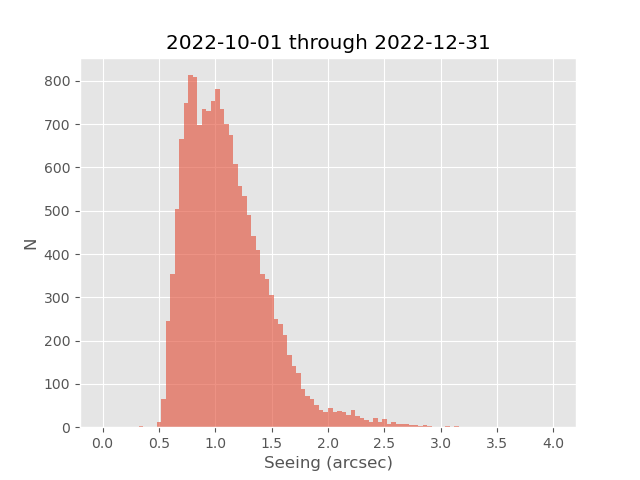

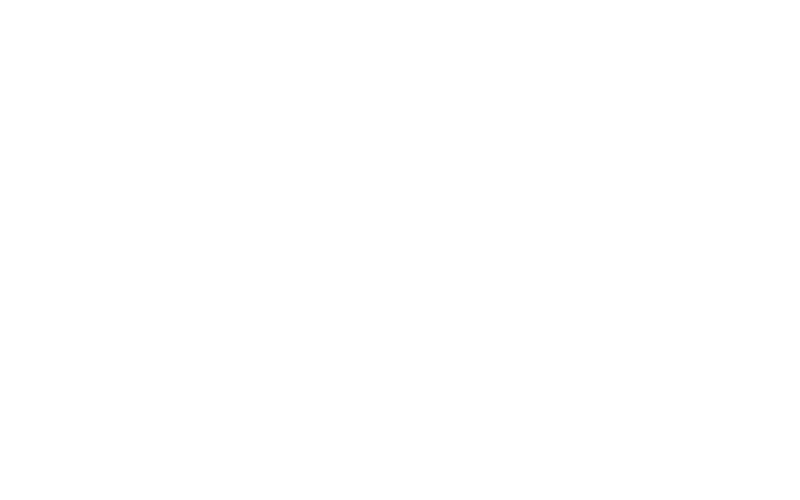

In [9]:
# make raw histogram of the zenith-corrected seeing column
fig = plt.figure(figsize=(8, 5))
fixed.hist(column='seeing', bins=100, range=(0.0, 4.0), alpha=0.6)
with plt.style.context('ggplot'):
    plt.title("2022-10-01 through 2022-12-31")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.show()

In [10]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(fixed['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(fixed['seeing'])
fit_median = exp_mu + loc

0.4019555137556263 0.23361293542004566 0.8028256470086685


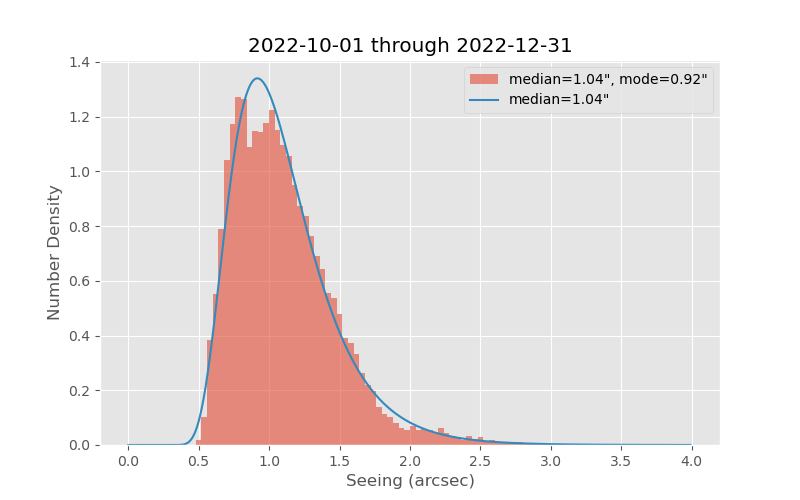

In [11]:
# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(fixed['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("2022-10-01 through 2022-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022q4_hist.png")
plt.show()

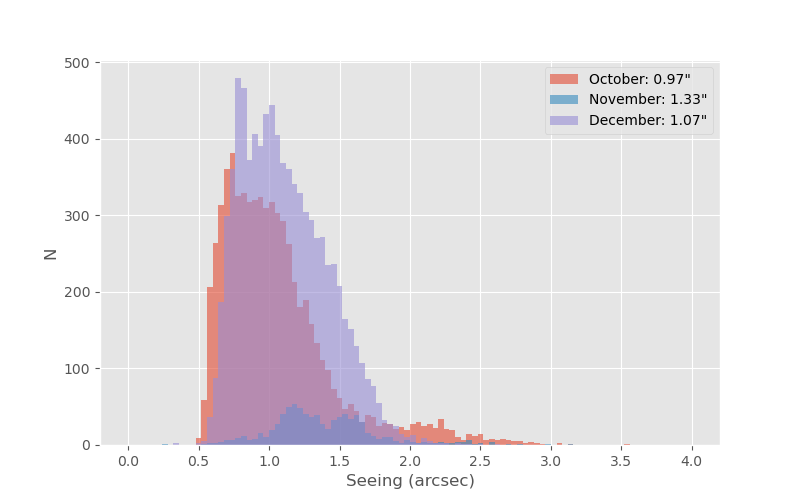

In [13]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
months = {}
legends = []
months['October'] = fixed.loc['2022-10']
months['November'] = fixed.loc['2022-11']
months['December'] = fixed.loc['2022-12']
for m in months:
    plt.hist(months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022q4_monthly.png")
plt.show()

In [14]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = fixed.between_time(start_time='00:00', end_time='07:00')
second_half = fixed.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

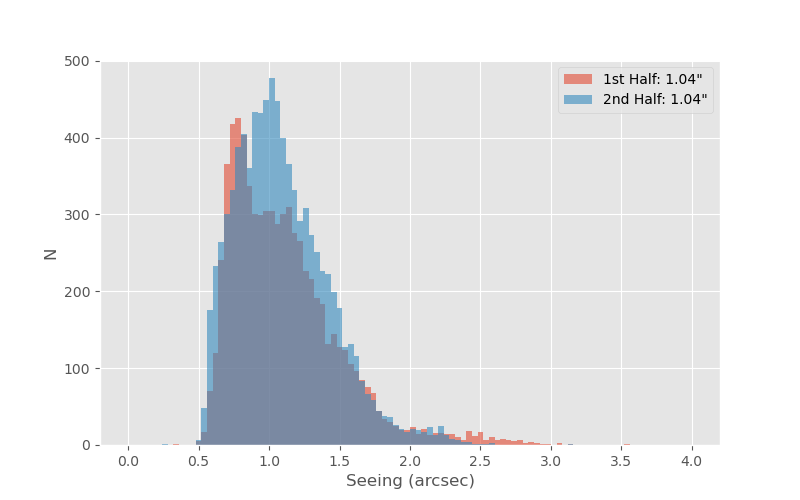

In [15]:
# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022q4_1st2nd.png")
plt.show()

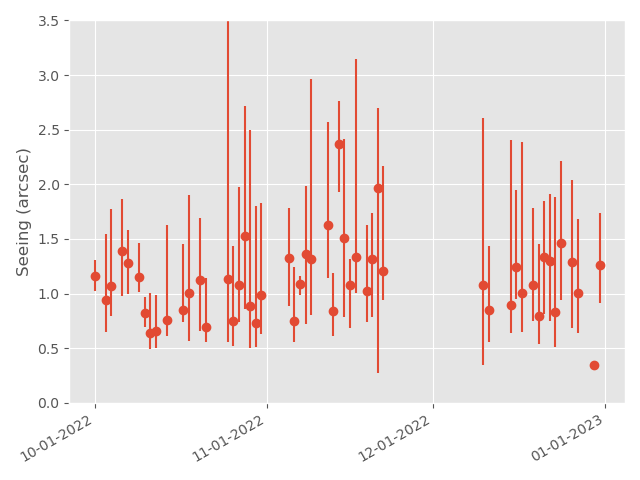

In [16]:
import matplotlib.dates as mdates

# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = fixed.seeing.resample('D').median()
daily['max'] = fixed.seeing.resample('D').max()
daily['min'] = fixed.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022q4_nightly.png")
plt.show()

In [17]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(fixed.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

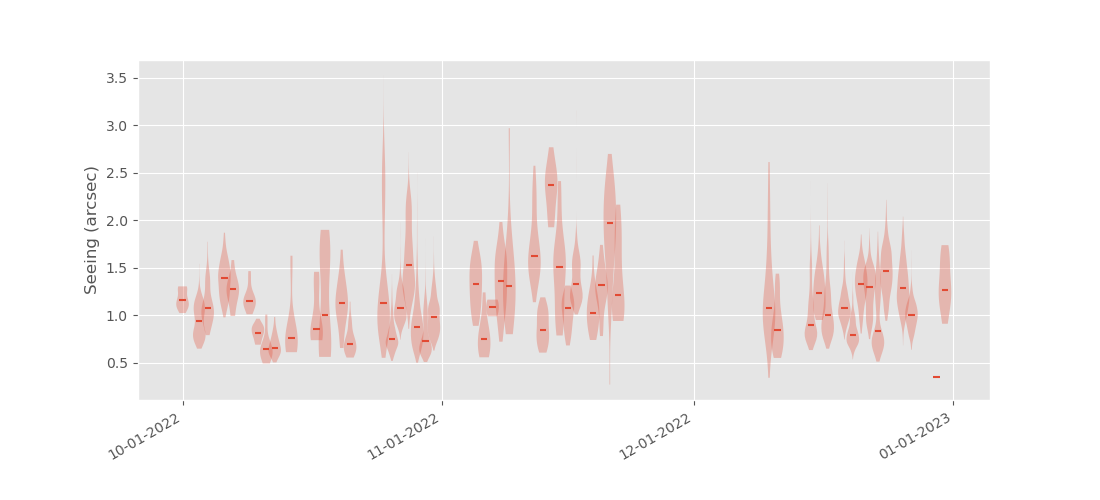

In [18]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022q4_violin.png")
    plt.show()

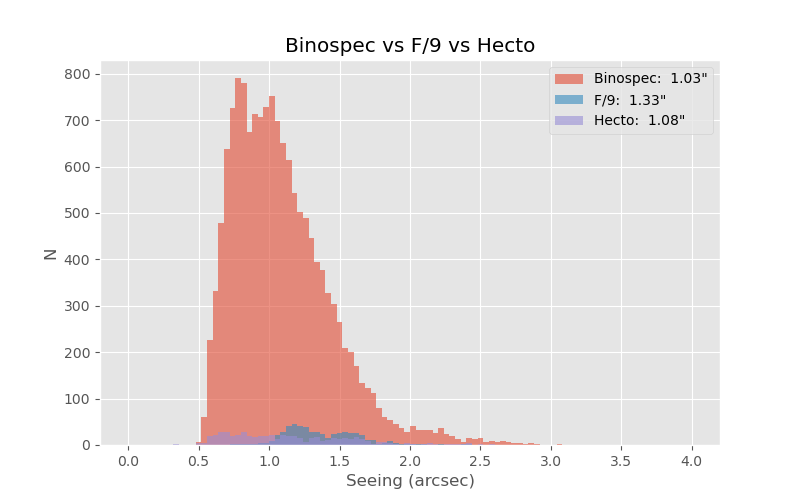

In [20]:
with plt.style.context('ggplot'):
    fig = plt.figure(figsize=(8, 5))
    medb = np.median(fixed['seeing'][fixed['wfs'] == 'binospec'])
    medm = np.median(fixed['seeing'][fixed['wfs'] == 'newf9'])
    medf = np.median(fixed['seeing'][fixed['wfs'] == 'f5'])
    plt.hist(fixed['seeing'][fixed['wfs'] == 'binospec'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Binospec: {medb: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'newf9'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"F/9: {medm: .2f}\"")
    plt.hist(fixed['seeing'][fixed['wfs'] == 'f5'], bins=100, range=(0.0, 4.), alpha=0.6, label=f"Hecto: {medf: .2f}\"")
    plt.legend()
    plt.title("Binospec vs F/9 vs Hecto")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
plt.savefig("bino_vs_mmirs_2022q4.png")
plt.show()

In [21]:
from minicyclop.io import read_seeing_data

In [22]:
cyclop = read_seeing_data(Path.home() / "MMT/minicyclop/data/MiniCyclop/Data/Seeing_Data.txt")

In [23]:
cyclop

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-06-08 03:32:32,6/8/2022 3:32:32 AM,2733.7,0.84,135.8,2022-06-08T03:32:32.968,1654659152968
2022-06-08 03:33:27,6/8/2022 3:33:27 AM,2755.7,0.84,134.4,2022-06-08T03:33:27.409,1654659207408
2022-06-08 03:34:23,6/8/2022 3:34:23 AM,2801.6,2.38,47.7,2022-06-08T03:34:23.655,1654659263655
2022-06-08 03:35:16,6/8/2022 3:35:16 AM,2853.2,1.01,112.3,2022-06-08T03:35:16.325,1654659316324
2022-06-08 03:36:00,6/8/2022 3:36:00 AM,2739.0,1.03,110.7,2022-06-08T03:36:00.691,1654659360691
...,...,...,...,...,...,...
2023-01-18 06:59:04,1/18/2023 6:59:04 AM,831.3,0.79,143.4,2023-01-18T06:59:04.949,1674025144948
2023-01-18 06:59:59,1/18/2023 6:59:59 AM,1103.5,0.75,152.0,2023-01-18T06:59:59.830,1674025199830
2023-01-18 07:01:21,1/18/2023 7:01:21 AM,948.7,0.74,152.3,2023-01-18T07:01:21.288,1674025281288


In [40]:
cyclop_q4 = cyclop[(cyclop.index >= '2022-10-01') & (cyclop.index < '2023-01-01')]

In [41]:
cyclop_q4

,UT,flux,seeing,r0,isot,epoch_ms
ut,,,,,,
2022-10-01 05:05:45,10/1/2022 5:05:45 AM,861.1,1.09,104.1,2022-10-01T05:05:45.217,1664600745216
2022-10-01 05:06:46,10/1/2022 5:06:46 AM,1152.2,1.25,90.8,2022-10-01T05:06:46.431,1664600806431
2022-10-01 05:07:42,10/1/2022 5:07:42 AM,1139.9,0.94,120.3,2022-10-01T05:07:42.064,1664600862064
2022-10-01 05:08:41,10/1/2022 5:08:41 AM,1210.8,1.20,94.3,2022-10-01T05:08:41.508,1664600921507
2022-10-01 05:09:37,10/1/2022 5:09:37 AM,1096.2,1.02,111.4,2022-10-01T05:09:37.823,1664600977823
...,...,...,...,...,...,...
2022-12-31 13:57:51,12/31/2022 1:57:51 PM,1357.1,1.46,77.9,2022-12-31T13:57:51.875,1672495071874
2022-12-31 13:58:39,12/31/2022 1:58:39 PM,1355.9,1.37,83.1,2022-12-31T13:58:39.550,1672495119550
2022-12-31 13:59:27,12/31/2022 1:59:27 PM,1544.4,1.04,109.2,2022-12-31T13:59:27.079,1672495167078


0.5753949930486937 0.40706489070447105 0.6660575201619081


/var/folders/vx/hkwj3_y50fgbdckq7hcv_p000000gn/T/ipykernel_18762/2314565581.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(8, 5))


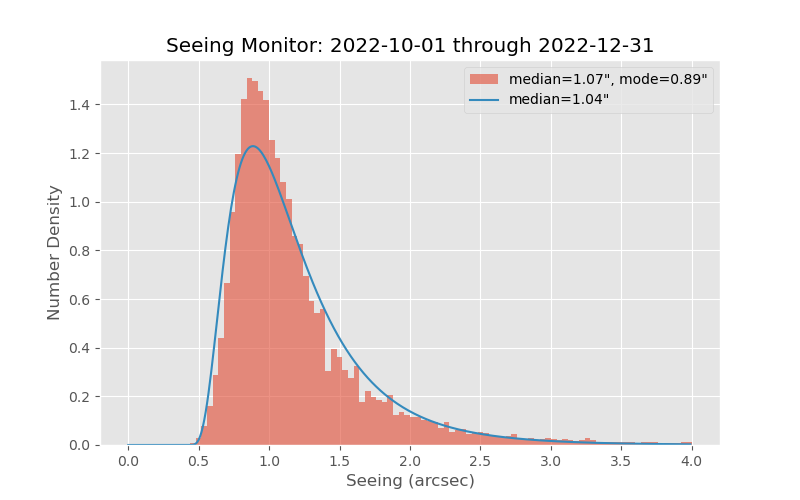

In [42]:
# fit a log-normal distribution to the seeing data
sigma, loc, exp_mu = lognorm.fit(cyclop_q4['seeing'])
print(sigma, loc, exp_mu)
x = np.arange(0.0, 4.0, 0.01)
p = lognorm.pdf(x, sigma, loc=loc, scale=exp_mu)
mu = np.log(exp_mu)
mode = np.exp(mu - sigma**2) + loc
median = np.nanmedian(cyclop_q4['seeing'])
fit_median = exp_mu + loc

# plot normalized histogram with the fit and the median/mode calculated from the fit.
fig = plt.figure(figsize=(8, 5))
with plt.style.context('ggplot'):
    plt.hist(cyclop_q4['seeing'], density=True, bins=100, range=(0.0, 4.0), label="hist", alpha=0.6)
    logp = plt.plot(x, p, label="logp")
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("Number Density")
    plt.title("Seeing Monitor: 2022-10-01 through 2022-12-31")
    plt.legend(["median=%.2f\", mode=%.2f\"" % (fit_median, mode), "median=%.2f\"" % (
        median
    )])
    plt.savefig("2022q4_cyclop_hist.png")
plt.show()

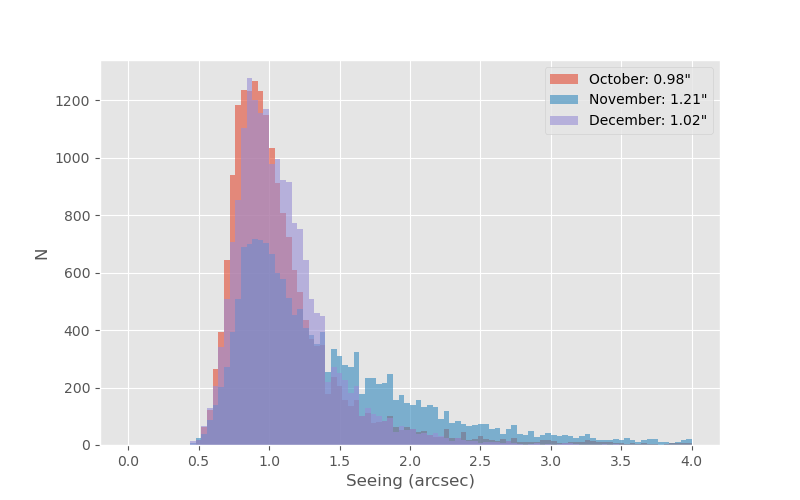

In [43]:
# panda time indexing makes it easy to group by month
fig = plt.figure(figsize=(8, 5))
cyc_months = {}
legends = []
cyc_months['October'] = cyclop_q4.loc['2022-10']
cyc_months['November'] = cyclop_q4.loc['2022-11']
cyc_months['December'] = cyclop_q4.loc['2022-12']
for m in months:
    plt.hist(cyc_months[m]['seeing'], bins=100, range=(0.0, 4.0), label=m, alpha=0.6)
    legend = "%s: %.2f\"" % (m, np.median(cyc_months[m]['seeing']))
    legends.append(legend)
plt.legend(legends)
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by month")
plt.savefig("2022q4_cyclop_monthly.png")
plt.show()

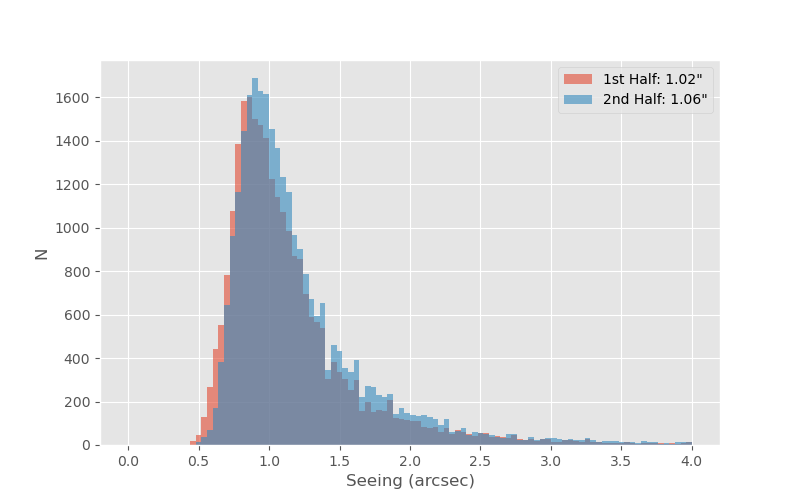

In [44]:
# now use the between_time() method to split the data into first and second halves of the night.
first_half = cyclop_q4.between_time(start_time='00:00', end_time='07:00')
second_half = cyclop_q4.between_time(start_time='07:00', end_time='14:00')
#first_half = months['December'].between_time(start_time='00:00', end_time='07:00')
#second_half = months['December'].between_time(start_time='07:00', end_time='14:00')
med_1st = np.median(first_half['seeing'])
med_2nd = np.median(second_half['seeing'])

# plot the results and show that the seeing is better later in the night...
fig = plt.figure(figsize=(8, 5))
plt.hist(first_half['seeing'], bins=100, range=(0.0, 4.0), label="1st", alpha=0.6)
plt.hist(second_half['seeing'], bins=100, range=(0.0, 4.0), label="2nd", alpha=0.6)
plt.legend(["1st Half: %.2f\"" % med_1st, "2nd Half: %.2f\"" % med_2nd])
plt.xlabel("Seeing (arcsec)")
plt.ylabel("N")
#plt.title("Data and median seeing values grouped by half of the night")
plt.savefig("2022q4_cyclop_1st2nd.png")
plt.show()

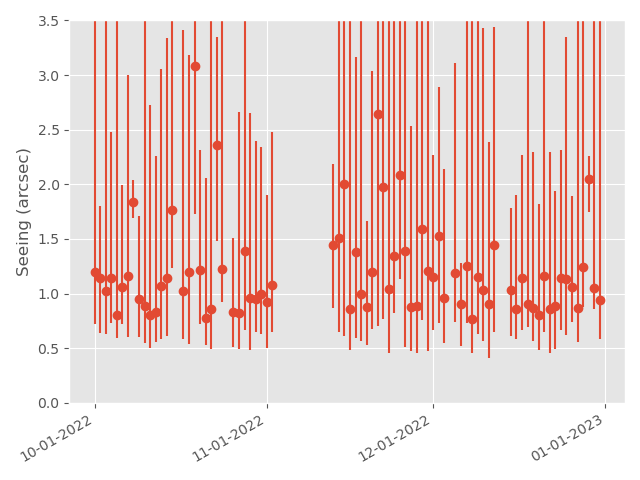

In [45]:
# make a new data frame that resamples the WFS data daily into the median, min, and max seeing for each day.
#fixed = fixed["2018-06-30":"2018-10-01"]
fig, ax = plt.subplots()
daily = pd.DataFrame()
daily['seeing'] = cyclop_q4.seeing.resample('D').median()
daily['max'] = cyclop_q4.seeing.resample('D').max()
daily['min'] = cyclop_q4.seeing.resample('D').min()
lowb = daily['seeing'] - daily['min']
upb = daily['max'] - daily['seeing']
plt.errorbar(daily.index, daily['seeing'], yerr=[lowb, upb], fmt='o')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
ax.set_ylim(0.0, 3.5)
fig.autofmt_xdate()
plt.tight_layout()
plt.ylabel("Seeing (arcsec)")
#plt.title("Nightly median seeing")
plt.savefig("2022q4_cyclop_nightly.png")
plt.show()

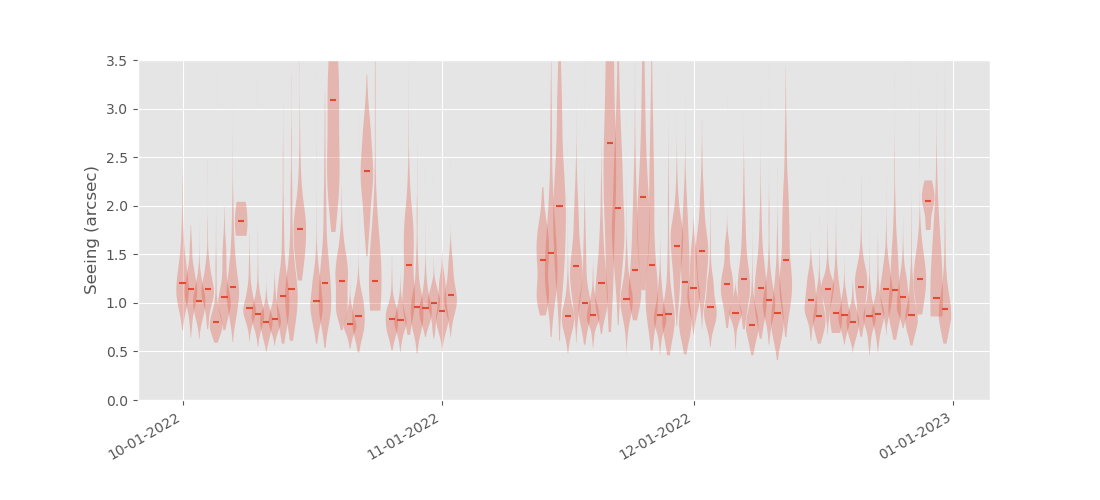

In [46]:
date_list = list(daily.index.strftime('%Y-%m-%d'))
data = [np.array(cyclop_q4.loc[date]['seeing']) for date in date_list]
clean_data = {}
for d, arr in zip(date_list, data):
    if len(arr) > 0:
        clean_data[d] = arr
date_labels = [datetime.strptime(d, "%Y-%m-%d").date() for d in clean_data.keys()]

with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(figsize=(11,5))
    plt.violinplot(clean_data.values(), mdates.date2num(date_labels), points=50, widths=1.5,
                showextrema=False, showmedians=True, bw_method='silverman')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%Y"))
    ax.set_ylim(0.0, 3.5)
    fig.autofmt_xdate()
    plt.ylabel("Seeing (arcsec)")
    plt.savefig("2022q4_cyclop_violin.png")
    plt.show()

In [47]:
f9 = fixed[fixed['wfs'] == 'newf9']
bino = fixed[fixed['wfs'] == 'binospec']
hecto = fixed[fixed['wfs'] == 'f5']

In [48]:
f9_dates = sorted(list(set(f9.index.strftime('%Y-%m-%d'))))
bino_dates = sorted(list(set(bino.index.strftime('%Y-%m-%d'))))
hecto_dates = sorted(list(set(hecto.index.strftime('%Y-%m-%d'))))
f9_dates, bino_dates, hecto_dates

(['2022-11-17', '2022-11-19', '2022-11-20', '2022-11-21', '2022-11-22'],
 ['2022-10-01',
  '2022-10-03',
  '2022-10-04',
  '2022-10-06',
  '2022-10-25',
  '2022-10-26',
  '2022-10-27',
  '2022-10-28',
  '2022-10-29',
  '2022-10-30',
  '2022-10-31',
  '2022-12-15',
  '2022-12-16',
  '2022-12-17',
  '2022-12-19',
  '2022-12-20',
  '2022-12-21',
  '2022-12-22',
  '2022-12-23',
  '2022-12-24',
  '2022-12-26',
  '2022-12-27'],
 ['2022-10-07',
  '2022-10-09',
  '2022-10-10',
  '2022-10-11',
  '2022-10-12',
  '2022-10-14',
  '2022-10-17',
  '2022-10-18',
  '2022-10-20',
  '2022-10-21',
  '2022-11-05',
  '2022-11-06',
  '2022-11-07',
  '2022-11-08',
  '2022-11-09',
  '2022-11-12',
  '2022-11-13',
  '2022-11-14',
  '2022-11-15',
  '2022-11-16',
  '2022-12-10',
  '2022-12-11',
  '2022-12-30',
  '2022-12-31'])

In [52]:
cyc_f9 = np.hstack([np.array(cyclop_q4.loc[date]['seeing']) for date in f9_dates])
cyc_bino = np.hstack([np.array(cyclop_q4.loc[date]['seeing']) for date in bino_dates])
cyc_hecto = np.hstack([np.array(cyclop_q4.loc[date]['seeing']) for date in hecto_dates])

In [50]:
np.median(cyc_f9)

1.34

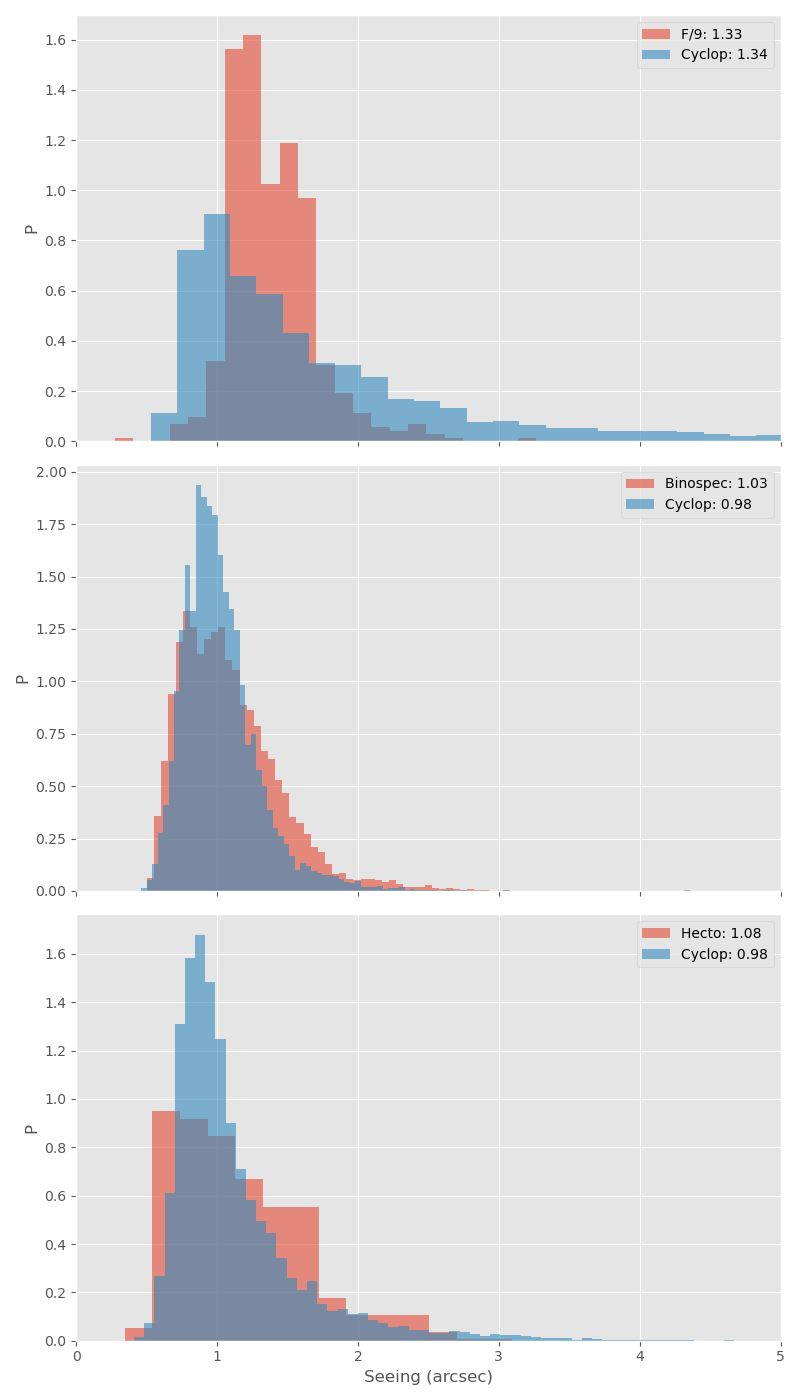

In [63]:
with plt.style.context('ggplot', after_reset=True):
    fig, ax = plt.subplots(3, 1, figsize=(8, 14), sharex=True)
    fig.subplots_adjust(hspace=0)
    hist(f9['seeing'], bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_f9, bins='scott', ax=ax[0], histtype='stepfilled', alpha=0.6, density=True)
    ax[0].legend([f"F/9: {np.median(f9['seeing']):.2f}", f"Cyclop: {np.median(cyc_f9):.2f}"])
    ax[0].set_ylabel("P")
    
    hist(bino['seeing'], bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_bino, bins='scott', ax=ax[1], histtype='stepfilled', alpha=0.6, density=True)
    ax[1].legend([f"Binospec: {np.median(bino['seeing']):.2f}", f"Cyclop: {np.median(cyc_bino):.2f}"])
    ax[1].set_ylabel("P")

    hist(hecto['seeing'], bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    hist(cyc_hecto, bins='scott', ax=ax[2], histtype='stepfilled', alpha=0.6, density=True)
    ax[2].legend([f"Hecto: {np.median(hecto['seeing']):.2f}", f"Cyclop: {np.median(cyc_hecto):.2f}"])
    ax[2].set_xlim(0, 5)
    ax[2].set_xlabel("Seeing (arcsec)")
    ax[2].set_ylabel("P")
    plt.tight_layout()
    plt.savefig("2022q4_cyclop_vs_inst.png")
    plt.show()

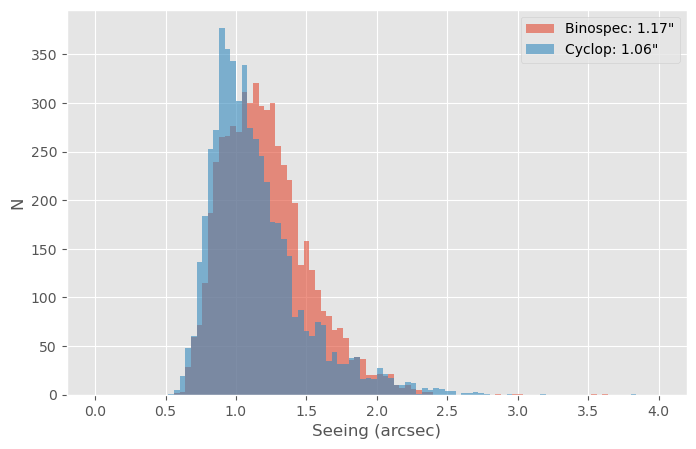

In [32]:
with plt.style.context('ggplot', after_reset=True):
    fig = plt.figure(figsize=(8, 5))
    plt.hist(bino['seeing'], bins=100, range=(0.0, 4.0), label="MMIRS", alpha=0.6)
    plt.hist(cyc_bino, bins=100, range=(0.0, 4.0), label="Cyclop", alpha=0.6)
    plt.legend(["Binospec: %.2f\"" % np.median(bino['seeing']), "Cyclop: %.2f\"" % np.median(cyc_bino)])
    plt.xlabel("Seeing (arcsec)")
    plt.ylabel("N")
    plt.savefig("2022q3_cyclop_bino.png")
    plt.show()